In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data from xlsx file
df = pd.read_excel('shopee_reviews.xlsx', 'Sheet1')
df.head()

,shopid,itemid,ctime,author_username,comment,rating_star,template_tags
0,223946658,11315955990,1670429351,s*****h,Performance:good\nBest Feature(s):yet to try\n...,5,"['Performance', 'Best Feature(s)', 'Value For ..."
1,223946658,11315955990,1653742257,bananaphone77,Performance:ok\nBest Feature(s):ok\nValue For ...,5,"['Performance', 'Best Feature(s)', 'Value For ..."
2,223946658,11315955990,1659064971,jasperjane80,Performance:Excellent.\nBest Feature(s):Back l...,5,"['Performance', 'Best Feature(s)', 'Value For ..."
3,223946658,11315955990,1637408323,s*****4,Came less than a week ! Consider fast! Keyboar...,5,[]
4,223946658,11315955990,1639452456,reeveschiu97,Packaging was a bust and the product was ok .....,2,[]


In [3]:
# Print out stats of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49791 entries, 0 to 49790
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   shopid           49791 non-null  int64 
 1   itemid           49791 non-null  int64 
 2   ctime            49791 non-null  int64 
 3   author_username  49662 non-null  object
 4   comment          49791 non-null  object
 5   rating_star      49791 non-null  int64 
 6   template_tags    49791 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.7+ MB


# Categorize data as "neutral" vs "opinionated"
### Define star rating of 1 and 2 as bad reviews, 3 as neutral, 4 and 5 as good reviews

In [4]:
# Polarity detection to differentiate the opinionated data as 'positive' vs 'negative'
def polarity_detection(value):
    if(value == 4):
        return 1
    elif(value == 5):
        return 1
    else:
        return 0

def organize_data(dataframe):
    # Remove rating of '3'
    dataframe = dataframe[dataframe['rating_star'] != 3]

    # Display the polarity
    dataframe['polarity'] = dataframe['rating_star'].apply(polarity_detection)
    
    dataframe = dataframe.loc[:,['itemid', 'comment', 'rating_star', 'polarity']]
    
    # Reset Index
    dataframe.reset_index(drop=True, inplace=True)

    return dataframe

In [5]:
clean_df = organize_data(df)
clean_df.head(20)

C:\Users\jezeb\AppData\Local\Temp\ipykernel_6132\3788293695.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['polarity'] = dataframe['rating_star'].apply(polarity_detection)


,itemid,comment,rating_star,polarity
0,11315955990,Performance:good\nBest Feature(s):yet to try\n...,5,1
1,11315955990,Performance:ok\nBest Feature(s):ok\nValue For ...,5,1
2,11315955990,Performance:Excellent.\nBest Feature(s):Back l...,5,1
3,11315955990,Came less than a week ! Consider fast! Keyboar...,5,1
4,11315955990,Packaging was a bust and the product was ok .....,2,0
5,11315955990,Performance:many colours\nBest Feature(s):many...,5,1
6,11315955990,Fast delivery and is working fine. However my ...,5,1
7,11315955990,I purchased it during the flash sale! I'm not ...,5,1
8,11315955990,Performance:Very Good\nBest Feature(s):Beautif...,5,1
9,11315955990,Performance:ok\nBest Feature(s):light is quite...,5,1


In [6]:
# Count number of positive and negative reviews
tb_counts = clean_df.polarity.value_counts()
tb_counts

1    46848
0     1648
Name: polarity, dtype: int64

# Manual Labelling Data (1000 records)

In [7]:
from nltk import agreement

In [8]:
# Read data from xlsx file
manually_labelled_df = pd.read_excel('manually_labelled_data.xlsx', 'Sheet1')

## Fleiss Kappa

In [9]:
# Measure the inter-annotator agreement between 3 raters

# Convert raters to numpy array
Rater_1 = manually_labelled_df['Rater_1'].to_numpy()
Rater_2 = manually_labelled_df['Rater_2'].to_numpy()
Rater_3 = manually_labelled_df['Rater_3'].to_numpy()

task_data = [[0,str(i),str(Rater_1[i])] for i in range(0,len(Rater_1))]+[[1,str(i),str(Rater_2[i])] 
    for i in range(0,len(Rater_2))]+[[2,str(i),str(Rater_3[i])] for i in range(0,len(Rater_3))]
rating_task = agreement.AnnotationTask(data=task_data)

# Print Fleiss' Kappa result
print("The Fleiss' Kappa score between 3 raters is ", str(rating_task.multi_kappa()))

The Fleiss' Kappa score between 3 raters is  0.8111594175222843


# Preprocessing Data

In [10]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jezeb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jezeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jezeb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Remove stopwords
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess_data(comment):
    
    # Remove unwanted characters and numbers
    comment = re.sub('[^A-Za-z0-9]+', ' ', comment)
    
    # Tokenization
    tokens = nltk.word_tokenize(comment)
    
    # Remove stopwords from the comment
    comment = [word for word in tokens if word not in stopwords]
    
    # Lemmatization
    comment = [lemmatizer.lemmatize(word) for word in comment]
    
    # Make entire comment to be lowercase
    comment = [c.lower() for c in comment]

    # Join words for preprocessed comment
    comment = ' '.join(str(comment))
    return comment

In [12]:
manually_labelled_df['preprocessed_comment'] = manually_labelled_df['Comment'].apply(lambda comment: preprocess_data(comment))
manually_labelled_df.head()

,Column,Comment,Rater_1,Rater_2,Rater_3,preprocessed_comment
0,11322,Quality is good but already indicated the font...,0,0,0,"[ ' q u a l i t y ' , ' g o o d ' , ' a l ..."
1,10707,Very nice quality stickers. Perfect for namin...,1,1,1,"[ ' v e r y ' , ' n i c e ' , ' q u a l i ..."
2,20077,"Beautiful fairy lights for artwork, gifts and ...",1,1,1,"[ ' b e a u t i f u l ' , ' f a i r y ' , ..."
3,5222,"Very nice and fixes my computer perfectly, wil...",1,1,1,"[ ' v e r y ' , ' n i c e ' , ' f i x ' , ..."
4,4952,Awesome product for the price. Good for printi...,1,1,1,"[ ' a w e s o m e ' , ' p r o d u c t ' , ..."


# Classification approach

## Naive Bayes Classification

In [13]:
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [14]:
# Create training & test split where 30% of the dataset is set aside for test
x_train, x_test, y_train, y_test = train_test_split(clean_df['comment'], clean_df['polarity'], test_size=0.3, random_state=0)

# Convert text data into bag of words
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Initialize NB
nb_classifier = MultinomialNB()

# Train model
nb_classifier.fit(x_train, y_train)

# Test model
y_pred = nb_classifier.predict(x_test)

# Evaluate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9669393085435425


### Evaluation metrics

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

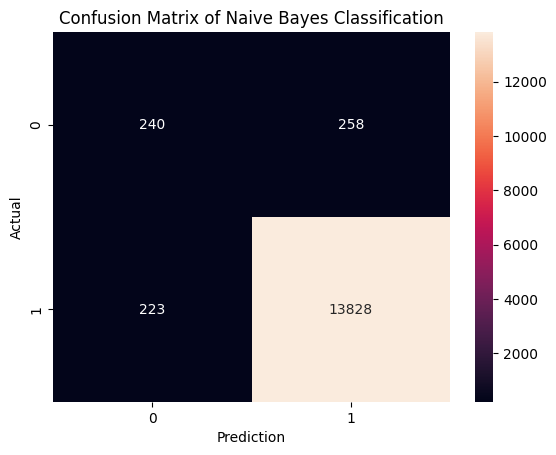

In [16]:
# Passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# True write data values in each cell of the matrix
sns.heatmap(cm, annot=True, fmt='d')

plt.title("Confusion Matrix of Naive Bayes Classification")
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [17]:
# Print precision, recall, and F-measure
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50       498
           1       0.98      0.98      0.98     14051

    accuracy                           0.97     14549
   macro avg       0.75      0.73      0.74     14549
weighted avg       0.97      0.97      0.97     14549



### Performance Metrics

### Records Classified Per Second

In [18]:
import time

In [19]:
# Create training & test split where 30% of the dataset is set aside for test
x_train, x_test, y_train, y_test = train_test_split(clean_df['comment'], clean_df['polarity'], test_size=0.3, random_state=0)

# Convert text data into bag of words
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Initialize NB
nb_classifier = MultinomialNB()

# Measure time taken to classify records
start_time = time.time()

# Train model
nb_classifier.fit(x_train, y_train)

# Test model
y_pred = nb_classifier.predict(x_test)

# Calculate classification rate
end_time = time.time()
classification_rate = len(clean_df) / (end_time - start_time)

print(f"Classification rate: {classification_rate:.2f} records per second")

Classification rate: 4453062.02 records per second


# Visualizing Classified Data

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

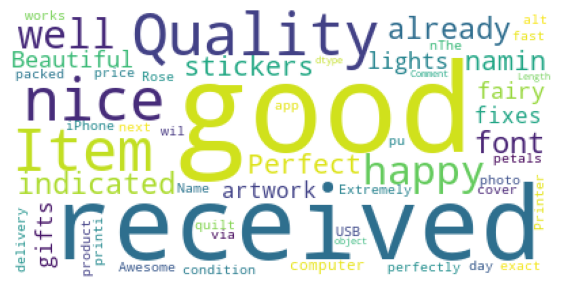

In [21]:
def display_word_cloud(data, title=None):
    word_cloud = WordCloud(background_color = 'white', max_words = 500).generate(str(data))
    plt.figure(figsize = [7, 7])
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

# Display Word Cloud
display_word_cloud(manually_labelled_df['Comment'])